In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import time

matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
matplotlib.rcParams.update({'font.size': 14})

In [6]:
from vne.vae import ShapeVAE, ShapeSimilarityLoss


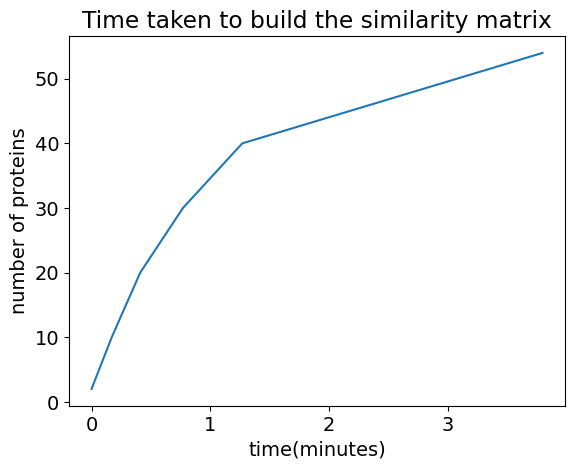

In [7]:
protein_num = [2, 10, 20, 30,40,54]
time_taken_4_similarity = [0.0, 0.17, 0.41, 0.77, 1.27, 3.8]
plt.plot(time_taken_4_similarity, protein_num)
plt.xlabel('time(minutes)')
plt.ylabel('number of proteins')
plt.title('Time taken to build the similarity matrix')
plt.savefig('time_SM.png', dpi=144)



In [8]:
import os
from vne.special.protein_AM import Protein_PDB, similarity_matrix

In [9]:
#PDB_path = '/bask/homes/h/hdjd5168/vjgo8416-ms-img-pc/marji/protein_vne/pdbs/'
PDB_path = '/Users/mfamili/Baskerville/protein_vne/pdbs/'
pdb_list = os.listdir(PDB_path)
pdb_name =[ PDB_path + name for name in pdb_list]
print(len(pdb_name))
slice_b = 0
slice_e = 5
pdb_name = pdb_name[slice_b:slice_e]
pdb_list = pdb_list[slice_b:slice_e]

FileNotFoundError: [Errno 2] No such file or directory: '/Users/mfamili/Baskerville/protein_vne/pdbs/'

In [ ]:
start_time = time.time()
molecules = [Protein_PDB(filename) for filename in pdb_name]
lookup = similarity_matrix(molecules)
print(round((time.time() - start_time)/60, 2))

In [ ]:
#lookup_copy = lookup
fig, ax = plt.subplots(figsize=(7, 7))
im = ax.imshow(lookup, vmin=-1, vmax=1, cmap=plt.cm.get_cmap('RdBu'))
ax.set_title('Shape similarity matrix - SOAP')
ax.set_xticks(np.arange(0, len(pdb_name)))
ax.set_xticklabels(pdb_list)
ax.set_yticks(np.arange(0, len(pdb_name)))
ax.set_yticklabels(pdb_list)
ax.tick_params(axis='x', rotation=90)
fig.colorbar(im, ax=ax)
plt.savefig('similarity_SOAP_rot.png', dpi=144)



In [8]:
from ase.build import molecule

species = ["H", "C", "O", "N"]
rcut = 6.0
nmax = 8
lmax = 6

# Setting up the SOAP descriptor
soap = SOAP(
    species=species,
    periodic=False,
    rcut=rcut,
    nmax=nmax,
    lmax=lmax,
)

# Molecule created as an ASE.Atoms
water = molecule("H2O")

# Create SOAP output for the system
soap_water = soap.create(water, positions=[0])

print(soap_water)
print(soap_water.shape)

NameError: name 'SOAP' is not defined

In [ ]:
from ase.build import molecule

# Molecule created as an ASE.Atoms
water = molecule("H2O")
print(water)
# Create SOAP output for the system
soap_water = soap.create(water, positions=[0])

print(soap_water)
print(soap_water.shape)

# Create output for multiple system
samples = [molecule("CH3ONO"), molecule("NO2"), molecule("CO2")]
positions = [[0], [1, 2], [1, 2]]
coulomb_matrices = soap.create(samples, positions)            # Serial
coulomb_matrices = soap.create(samples, positions, n_jobs=2)  # Parallel
coulomb_matrices[0].shape

In [ ]:
import math, random
from ase.visualize import view

atoms = Atoms(
    cell = [
        [5.6402, 0.0, 0.0],
        [0.0, 5.6402, 0.0],
        [0.0, 0.0, 5.6402]],
    scaled_positions = 
        obj.pdb_to_coordinates(), 
    symbols = ['H']* int(obj.pdb_to_coordinates().shape[0]/2) +['O']* int(obj.pdb_to_coordinates().shape[0]/2)
)



In [ ]:
loader = DensitySimulator(pdb_name)
list = loader.keys()
list
density = loader('1ob2.cif')
density

In [ ]:
import plotly.express as px
df = DensitySimulator(pdb_name)

fig = px.density_heatmap(df, x="total_bill", y="tip")
fig.show()

In [ ]:
import numpy as np
from ase import Atoms
from dscribe.descriptors import SOAP
import os
import gemmi


species = ["H"]
rcut = 12.0
nmax = 16
lmax = 9

# Setting up the SOAP descriptor
soap = SOAP(
    species=species,
    periodic=False,
    rcut=rcut,
    nmax=nmax,
    lmax=lmax,
)

class affinity_matrix: 
    
    
    def __init__(self,
        filename: os.PathLike
        
    ):
        self.filename = filename 

    def pdb_coordinates(self) -> np.ndarray:
        AXES = ["Cartn_x", "Cartn_y", "Cartn_z"]

        doc = gemmi.cif.read_file(self.filename)  # copy all the data from mmCIF file
        block = doc.sole_block()  # mmCIF has exactly one block

        data = block.find("_atom_site.", AXES)
        symbols = list(block.find_loop('_atom_type.symbol'))

        coords = np.stack(
            [
                [float(r) for r in data.column(idx)]
                for idx in range(len(AXES))
            ],
            axis = -1
        )
        # center the molecule in XYZ
        centroids = np.mean(coords, axis=0)
        coords = coords - centroids
        return coords
    
    def pdb_symbols(self) -> np.ndarray:
        return list(self.block.find_loop('_atom_type.symbol'))
    
    



In [ ]:
import numpy as np
from ase import Atoms
from dscribe.descriptors import SOAP
import os
import gemmi

def pdb_read_block(filename) -> np.ndarray:
    doc = gemmi.cif.read_file(filename)  # copy all the data from mmCIF file
    block = doc.sole_block()  # mmCIF has exactly one block
    return block

def pdb_coord(filename)-> np.ndarray:
    AXES = ["Cartn_x", "Cartn_y", "Cartn_z"]
    positions = pdb_read_block(filename).find("_atom_site.", AXES)

    coords = np.stack(
        [
            [float(r) for r in positions.column(idx)]
            for idx in range(len(AXES))
        ],
        axis = -1
    )
    # center the molecule in XYZ
    centroids = np.mean(coords, axis=0)
    coords = coords - centroids

    return coords

def pdb_symbols(filename)-> np.ndarray:
    symbols = []
    species = [] 

    symbols = list(pdb_read_block(filename).find_values("_atom_site.type_symbol"))
    species = list(pdb_read_block(filename).find_loop('_atom_type.symbol'))
    symbols2 = []
    symbols_lower = []
    

    symbols = [s.title() for s in symbols]


    return symbols, species

def pdb_four_symbols(filename)-> np.ndarray:
    symbols = []
    species = [] 
    elements =  ['C', 'N', 'O', 'S']
    symbols = list(pdb_read_block(filename).find_values("_atom_site.type_symbol"))
    species = list(pdb_read_block(filename).find_loop('_atom_type.symbol'))

    msk = map(lambda x : True  if x in elements else False, species)
    # print(msk)
    return symbols, species



def pdb_features(filename) -> np.array:
    sym = [] 
    spec = []
    
    coords = pdb_coord(filename)
    positions = coords.tolist()
    sym, spec = pdb_symbols(filename)
    #print([i for i in sym])    
    atoms = Atoms(symbols=sym, positions=positions)
    
    rcut = 6.0
    nmax = 8
    lmax = 6
    # Setting up the SOAP descriptor
    soap = SOAP(
        species=spec,
        periodic=False,
        rcut=rcut,
        nmax=nmax,
        lmax=lmax,
    )
    
    features = soap.create(
        atoms,
        positions=[0,0,0],
    )
    
    return features  # normalize(features)


'''
output = []
for x in symbols:
    if x not in output:
        output.append(x)
print('unique ', output)

pdb_features(pdb_name[0])
#pdb_four_symbols(pdb_name[0])
'''
symbols , species = pdb_symbols(pdb_name[3])
print([i for i in symbols if len(i)>1])
